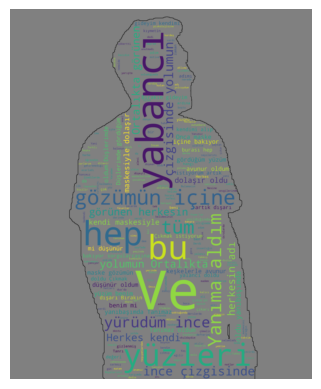

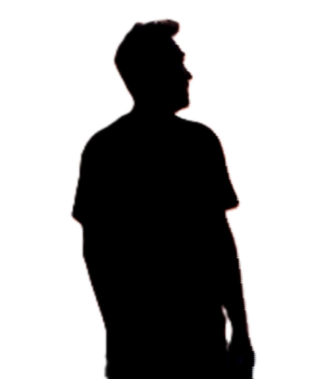

In [2]:


from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

from PIL import Image

# Decompression bomb error ayarını değiştirme

Image.MAX_IMAGE_PIXELS = None  # Sınırı kaldır


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text, specifying the encoding as UTF-8
text = open(path.join(d, 'sago.txt'), encoding='utf-8').read()  # yazdırmak istediğiniz metni txt formatında burada belirtin

# read the mask image
alice_mask = np.array(Image.open(path.join(d, "mask.png")))  # maskeleme yapılmasını istediğiniz dosyayı uzantısıyla bu kısma yazın

stopwords = set(STOPWORDS)
stopwords.add("said")

# wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
#                stopwords=stopwords, contour_width=3, contour_color='steelblue')


wc = WordCloud(background_color="gray", max_words=3000, mask=alice_mask,
             stopwords=stopwords, contour_width=3, contour_color='black',
             min_font_size=7, scale=3)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "outputh.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()
